In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\surface\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\surface\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\surface\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


0.09063462346100909


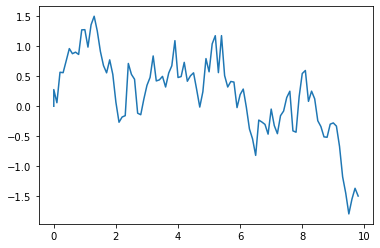

In [4]:
# dX = AXdt + h dW

N = 100 # total number of points

x_ns = np.zeros(N)
t_ns = np.zeros(N)

# W is brownian motion
# distribution for f(X(t)|X(s))
A = -1
h = 1
dt = 0.1 # T = 10
# assume at t = 0
xs = 0
s = 0

for idx in range(N):
    x_ns[idx] = xs
    t_ns[idx] = s
    
    m_t = np.exp(A*dt)*xs
    P_t = h**2/2/A*(np.exp(2*A*dt)-1)
    
    s = dt*idx
    xs = np.random.normal(m_t, P_t**0.5)
    
print(P_t)
plt.plot(t_ns, x_ns)
plt.savefig('Brownian.png')

In [ ]:
# book: a first course in mathematical analysis, J.C.Burkill
# simulate Gamma processs, TS process (Cont&tamkoff, paper with yaman kindap)

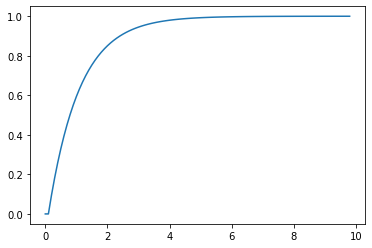

In [3]:
# dX = AXdt + h dW

N = 100 # total number of points
dt = 0.1

x_ns = np.zeros(N)
t_ns = np.zeros(N)

# W is linear increase W = tb
# distribution for f(X(t)|X(s))
A = -1
h = 1

b = 1 # for W

# assume at t = 0
xs = 0
s = 0

for idx in range(N):
    x_ns[idx] = xs
    t_ns[idx] = s
    
    xs = np.exp(A*s)*0+1/A*h*b*(np.exp(A*s)-1)
    s = dt*idx

plt.plot(t_ns, x_ns)
plt.savefig('Drift.png')

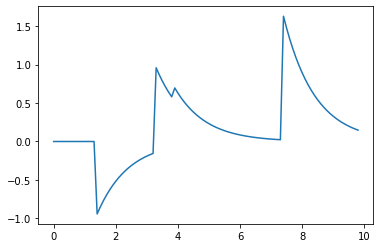

In [5]:
x_ns = np.zeros(N)
t_ns = np.zeros(N)

# assume at t = 0
xs = 0
s = 0

# W is a series of jumps
I = np.random.poisson(lam = 10) # number of jumps
Us = np.random.normal(0, 1, I) # size of jumps
Vs = np.random.uniform(0, 10, I)

for idx in range(N):
    x_ns[idx] = xs
    t_ns[idx] = s
    
    xs = np.exp(A*s)*0
    s = dt*idx
    for u,v in zip(Us, Vs):
        if v<s:
            xs += h*u*np.exp(A*(s-v))

plt.plot(t_ns, x_ns)
plt.savefig('Jump.png')

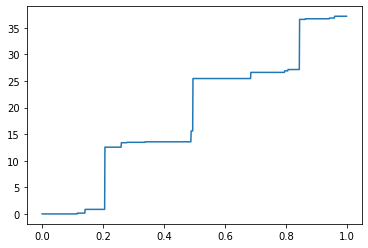

In [8]:
# tempered stable process
N = 1000
T = 1
M = 100

C = 5
alpha = 0.5
beta = 0.9

gammas = []
gamma = 0
while gamma<M*T:
    delta_gamma = np.random.exponential(scale = 1.0)
    gamma = gamma+delta_gamma
    gammas.append(gamma)

xs = [] # accepted jumps
vs = [] # jump times
for i in range(len(gammas)):
    xi = (alpha*gammas[i]/C)**(-1/alpha)
    U = np.random.uniform()
    if U>= np.exp(-beta*xi):
        xs.append(xi)
        vi = np.random.uniform(0,T)
        vs.append(vi)
    else:
        continue

# simulate trajectory from jumps
x_ns = np.zeros(N)
t_ns = np.zeros(N)
for i in range(N):
    t = i*T/N
    t_ns[i] = t
    x_ns[i] = sum([x for x, v in zip(xs, vs) if v <= t])
    
plt.plot(t_ns, x_ns)
        